In [ ]:
#import necessary packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


%matplotlib inline

In [ ]:
#mount to google drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import dataset(s)
path = '/content/drive/MyDrive/heart_disease_uci.csv'
dataset = pd.read_csv(path)
dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#handle any missing (na values)
dataset.dropna(inplace = True)
dataset

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,509,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [ ]:
#check for NA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [ ]:
#perform one hot encoding on categorical variables and then change numerical 0,1,2,3,4 values into 0/1 binary for classification
dataset['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
dataset['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = dataset[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((dataset['num'] > 0)*1).copy()
data_tmp['sex'] = (dataset['sex'] == 'Male')*1
data_tmp['fbs'] = (dataset['fbs'])*1
data_tmp['exang'] = (dataset['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical_angina,145.0,233.0,1,150.0,0,2.3,downsloping,0.0,fixed_defect,0
1,67,1,asymptomatic,160.0,286.0,0,108.0,1,1.5,flat,3.0,normal,1
2,67,1,asymptomatic,120.0,229.0,0,129.0,1,2.6,flat,2.0,reversable_defect,1
3,37,1,non-anginal,130.0,250.0,0,187.0,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical_angina,130.0,204.0,0,172.0,0,1.4,upsloping,0.0,normal,0
5,56,1,atypical_angina,120.0,236.0,0,178.0,0,0.8,upsloping,0.0,normal,0
6,62,0,asymptomatic,140.0,268.0,0,160.0,0,3.6,downsloping,2.0,normal,1
7,57,0,asymptomatic,120.0,354.0,0,163.0,1,0.6,upsloping,0.0,normal,0
8,63,1,asymptomatic,130.0,254.0,0,147.0,0,1.4,flat,1.0,reversable_defect,1
9,53,1,asymptomatic,140.0,203.0,1,155.0,1,3.1,downsloping,0.0,reversable_defect,1


In [ ]:
data = pd.get_dummies(data_tmp, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'fasting_blood_sugar_0',
       'fasting_blood_sugar_1', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_type_downsloping',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_fixed_defect', 'thalassemia_type_normal',
       'thalassemia_type_reversable_defect'],
      dtype='object')

In [ ]:
#once preprocessing is complete, we can try a basic logistic regression prediction
from sklearn.model_selection import train_test_split
y = data['target']
X = data.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (239, 21)
Shape of y_train: (239,)
Shape of X_test: (60, 21)
Shape of y_test: (60,)


In [ ]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values
X_test

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,chest_pain_type_typical_angina,fasting_blood_sugar_0,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect
209,0.692308,0.0,0.651163,0.566929,0.622642,0.225806,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
190,0.384615,1.0,0.406977,0.377953,0.707547,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12,0.538462,1.0,0.418605,0.614173,0.509434,0.096774,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
222,0.102564,0.0,0.000000,0.389764,0.858491,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
240,0.153846,1.0,0.186047,0.531496,0.613208,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
137,0.692308,1.0,0.302326,0.712598,0.141509,0.225806,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
231,0.512821,0.0,1.000000,0.893701,0.273585,0.548387,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
208,0.512821,1.0,0.418605,0.637795,0.632075,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
52,0.230769,1.0,0.209302,0.748031,0.613208,0.000000,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
109,0.102564,1.0,0.279070,0.468504,0.490566,0.193548,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)
y_pred = logre.predict(X_test)

In [ ]:
#next, we can check our metrics like accuracy, precision, recall, and f1-score
from sklearn.metrics import accuracy_score
print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


The Accuracy Score is:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.74      0.82        31

    accuracy                           0.83        60
   macro avg       0.85      0.84      0.83        60
weighted avg       0.85      0.83      0.83        60



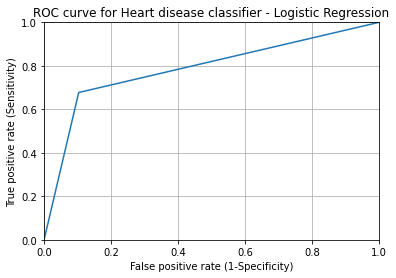

In [ ]:


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier - Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)



We can see this Logistic Regression model is somewhat accurate, with it being more specific than sensitive.

# TESTING DIFFERENT MODELS

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier



weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



The Accuracy Score is:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.87      0.65      0.74        31

    accuracy                           0.77        60
   macro avg       0.79      0.77      0.76        60
weighted avg       0.79      0.77      0.76        60



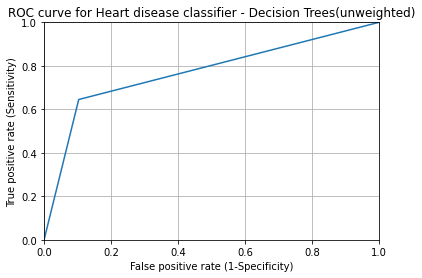

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier - Decision Trees(unweighted)')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:


# Perform Decision Tree model with class weighting
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



The Accuracy Score is:  0.6833333333333333
              precision    recall  f1-score   support

           0       0.73      0.55      0.63        29
           1       0.66      0.81      0.72        31

    accuracy                           0.68        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.69      0.68      0.68        60



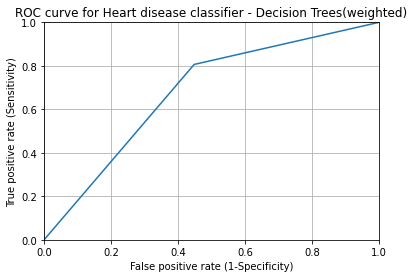

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier - Decision Trees(weighted)')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.02, max_depth=3, n_estimators=150)
gradient_booster.fit(X_train, y_train)
y_pred = gradient_booster.predict(X_test)

print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

The Accuracy Score is:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        31

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



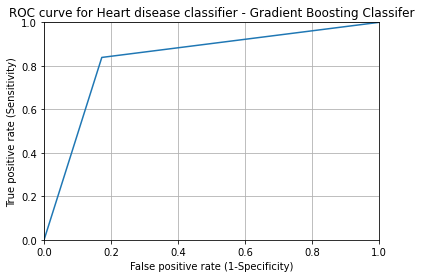

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier - Gradient Boosting Classifer')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

The Accuracy Score is:  0.7666666666666667
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.84      0.68      0.75        31

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.77      0.77        60



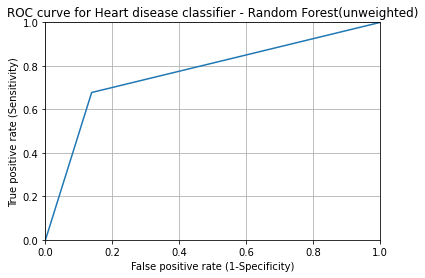

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier - Random Forest(unweighted)')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
clf = RandomForestClassifier(n_estimators=150, class_weight='balanced_subsample')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('The Accuracy Score is: ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

The Accuracy Score is:  0.85
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.92      0.77      0.84        31

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60



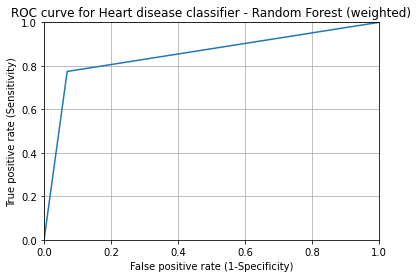

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier - Random Forest (weighted)')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)